## Prelims, libraries and initialization

In [1]:
import gzip
import shutil
from pathlib import Path

# Directories to search for gzipped PDB files
base_dirs = [Path("gfp_outputs"), Path("gfp_rf2")]

# Loop over all .pdb.gz files and unzip them
for base_dir in base_dirs:
    for gz_file in base_dir.rglob("*.pdb.gz"):
        output_file = gz_file.with_suffix('')  # removes .gz → leaves .pdb
        print(f"Unzipping {gz_file} → {output_file}")

        with gzip.open(gz_file, 'rb') as f_in:
            with open(output_file, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

print("✅ All .pdb.gz files have been unzipped.")


Unzipping gfp_rf2/nb_gfp_des_10_dldesign_0_best.pdb.gz → gfp_rf2/nb_gfp_des_10_dldesign_0_best.pdb
Unzipping gfp_rf2/nb_gfp_des_9_dldesign_0_best.pdb.gz → gfp_rf2/nb_gfp_des_9_dldesign_0_best.pdb
Unzipping gfp_rf2/nb_gfp_des_5_dldesign_0_best.pdb.gz → gfp_rf2/nb_gfp_des_5_dldesign_0_best.pdb
Unzipping gfp_rf2/nb_gfp_des_2_dldesign_0_best.pdb.gz → gfp_rf2/nb_gfp_des_2_dldesign_0_best.pdb
Unzipping gfp_rf2/nb_gfp_des_15_dldesign_0_best.pdb.gz → gfp_rf2/nb_gfp_des_15_dldesign_0_best.pdb
Unzipping gfp_rf2/nb_gfp_des_17_dldesign_0_best.pdb.gz → gfp_rf2/nb_gfp_des_17_dldesign_0_best.pdb
Unzipping gfp_rf2/nb_gfp_des_12_dldesign_0_best.pdb.gz → gfp_rf2/nb_gfp_des_12_dldesign_0_best.pdb
Unzipping gfp_rf2/nb_gfp_des_3_dldesign_0_best.pdb.gz → gfp_rf2/nb_gfp_des_3_dldesign_0_best.pdb
Unzipping gfp_rf2/nb_gfp_des_1_dldesign_0_best.pdb.gz → gfp_rf2/nb_gfp_des_1_dldesign_0_best.pdb
Unzipping gfp_rf2/nb_gfp_des_14_dldesign_0_best.pdb.gz → gfp_rf2/nb_gfp_des_14_dldesign_0_best.pdb
Unzipping gfp_rf2/nb

In [2]:
# get the libs - collect here so we know what we are using.
import re
from Bio.PDB import PDBParser, Polypeptide
from Bio.SeqUtils import seq1
from pathlib import Path
import pandas as pd

parser = PDBParser(QUIET=True)

In [3]:
# get the libs - collect here so we know what we are using.
import re
from Bio.PDB import PDBParser, Polypeptide
from Bio.SeqUtils import seq1
from pathlib import Path
import pandas as pd

parser = PDBParser(QUIET=True)

## Set the pdb files path

In [4]:
from pathlib import Path

base_dir = [Path("gfp_outputs"), Path("gfp_rf2")]  # Replace with your root folder

pdb_files = []

for base_dir in base_dirs:
    for file in base_dir.rglob("*.pdb"):
        if file.parent == base_dir:
            pdb_files.append({
                "File Name": file.name,
                "Full Path": file.resolve()
            })

print(f"Found {len(pdb_files)} *.pdb files")

file_names = [file["File Name"] for file in pdb_files]
print(file_names)

df_files = pd.DataFrame(pdb_files)

df_files[["File Name"]]


Found 40 *.pdb files
['nb_gfp_des_6.pdb', 'nb_gfp_des_12.pdb', 'nb_gfp_des_13.pdb', 'nb_gfp_des_1.pdb', 'nb_gfp_des_11.pdb', 'nb_gfp_des_17.pdb', 'nb_gfp_des_9.pdb', 'nb_gfp_des_18.pdb', 'nb_gfp_des_2.pdb', 'nb_gfp_des_7.pdb', 'nb_gfp_des_16.pdb', 'nb_gfp_des_8.pdb', 'nb_gfp_des_4.pdb', 'nb_gfp_des_19.pdb', 'nb_gfp_des_14.pdb', 'nb_gfp_des_15.pdb', 'nb_gfp_des_10.pdb', 'nb_gfp_des_5.pdb', 'nb_gfp_des_3.pdb', 'nb_gfp_des_0.pdb', 'nb_gfp_des_18_dldesign_0_best.pdb', 'nb_gfp_des_12_dldesign_0_best.pdb', 'nb_gfp_des_5_dldesign_0_best.pdb', 'nb_gfp_des_10_dldesign_0_best.pdb', 'nb_gfp_des_15_dldesign_0_best.pdb', 'nb_gfp_des_0_dldesign_0_best.pdb', 'nb_gfp_des_11_dldesign_0_best.pdb', 'nb_gfp_des_1_dldesign_0_best.pdb', 'nb_gfp_des_6_dldesign_0_best.pdb', 'nb_gfp_des_2_dldesign_0_best.pdb', 'nb_gfp_des_4_dldesign_0_best.pdb', 'nb_gfp_des_13_dldesign_0_best.pdb', 'nb_gfp_des_16_dldesign_0_best.pdb', 'nb_gfp_des_9_dldesign_0_best.pdb', 'nb_gfp_des_14_dldesign_0_best.pdb', 'nb_gfp_des_7_dldesi

,File Name
0,nb_gfp_des_6.pdb
1,nb_gfp_des_12.pdb
2,nb_gfp_des_13.pdb
3,nb_gfp_des_1.pdb
4,nb_gfp_des_11.pdb
5,nb_gfp_des_17.pdb
6,nb_gfp_des_9.pdb
7,nb_gfp_des_18.pdb
8,nb_gfp_des_2.pdb
9,nb_gfp_des_7.pdb


## How many chains/file?

In [5]:
from collections import Counter

chain_counts = []

for pdb_dict in sorted(pdb_files, key=lambda x: x['Full Path']):
    pdb_path = pdb_dict['Full Path']  # PosixPath object
    structure = parser.get_structure(pdb_path.stem, pdb_path)
    chain_ids = set()
    for model in structure:
        for chain in model:
            chain_ids.add(chain.id)
        break  # first model only
    num_chains = len(chain_ids)
    classification = "single" if num_chains == 2 else "multi" if num_chains % 2 == 0 else "other"
    chain_counts.append({
        "Study" : pdb_path.parent.stem,
        "PDB": pdb_path.name,
        "NumChains": num_chains,
        "Classification": classification,
        "Chains": ",".join(sorted(chain_ids))
    })

df_chains = pd.DataFrame(chain_counts)
df_chains.sort_values(by="NumChains").reset_index(drop=True)


,Study,PDB,NumChains,Classification,Chains
0,gfp_outputs,nb_gfp_des_0.pdb,2,single,"H,T"
1,gfp_outputs,nb_gfp_des_1.pdb,2,single,"H,T"
2,gfp_outputs,nb_gfp_des_10.pdb,2,single,"H,T"
3,gfp_outputs,nb_gfp_des_11.pdb,2,single,"H,T"
4,gfp_outputs,nb_gfp_des_12.pdb,2,single,"H,T"
5,gfp_outputs,nb_gfp_des_13.pdb,2,single,"H,T"
6,gfp_outputs,nb_gfp_des_14.pdb,2,single,"H,T"
7,gfp_outputs,nb_gfp_des_15.pdb,2,single,"H,T"
8,gfp_outputs,nb_gfp_des_16.pdb,2,single,"H,T"
9,gfp_outputs,nb_gfp_des_17.pdb,2,single,"H,T"


## Build the Data Frame

In [6]:
# alternative layout noting the chain pairs
# Use as is, goal: df with chain, H or antigen chain, chain sequence; take code out
# add code that prints just the sequences, play with extracting different 
def parse_remark_5_roles(pdb_path):
    struct = {}
    hchains = set()
    agchains = set()
    with open(pdb_path) as f:
        for line in f:
            if line.startswith("REMARK   5 SINGLE HCHAIN="):
                match = re.search(r"HCHAIN=(\w)\s+AGCHAIN=(\w)", line)
                if match:
                    h, ag = match.group(1), match.group(2)
                    struct[h] = ag
                    hchains.add(h)
                    agchains.add(ag)
    return struct, hchains, agchains


def extract_chain_sequences_selective(pdb_path, agchains_wanted):
    structure = parser.get_structure(pdb_path.stem, pdb_path)
    chain_seqs = {}
    for model in structure:
        for chain in model:
            residues = []
            for res in chain:
                hetfield, resseq, icode = res.id
                is_hetatm = hetfield != " "
                is_ag = chain.id in agchains_wanted

                if is_hetatm and not is_ag:
                    continue  # skip HETATM for HChains

                try:
                    aa = seq1(res.get_resname(), custom_map={"MSE": "M", "SEP": "S", "TPO": "T", "PTR": "Y"})
                    residues.append(aa)
                except KeyError:
                    continue
            if residues:
                chain_seqs[chain.id] = "".join(residues)
        break  # only first model
    return chain_seqs


records = []

for pdb_file in pdb_files:
    pdb_path = pdb_file["Full Path"]  #  get the Path object or string
    struct, hchains, agchains = parse_remark_5_roles(pdb_path)
    chain_seqs = extract_chain_sequences_selective(pdb_path, agchains)
    
    for cid, seq in chain_seqs.items():
        role = "HChain" if cid in hchains else "AGChain" if cid in agchains else "Other"
        # Determine which chain this one pairs with, if any
        if role == "HChain":
            pairs_with = struct.get(cid, None)
        elif role == "AGChain":
            # reverse lookup for AGChain
            pairs_with = [h for h, ag in struct.items() if ag == cid]
            pairs_with = ",".join(pairs_with) if pairs_with else None
        else:
            pairs_with = None
            records.append({
             "Study" : pdb_path.parent.stem,
            "PDB": pdb_path.name,
            "Structure": struct,
            "Chain": cid,
            "PairsWith": pairs_with,
            "Role": role,
            "Length": len(seq),
            "Sequence": seq,
        })

df = pd.DataFrame(records)

# sequence only
# df[["Sequence"]]
# w/ chain, role, and sequence
df[["Chain", "Role", "Sequence"]]

,Chain,Role,Sequence
0,H,Other,VQLQESGGGSVQAGGSLRLSCAASGGGGGGGSMAWFRQAPGKECEL...
1,T,Other,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...
2,H,Other,VQLQESGGGSVQAGGSLRLSCAASGGGGGGGSMAWFRQAPGKECEL...
3,T,Other,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...
4,H,Other,VQLQESGGGSVQAGGSLRLSCAASGGGGGGGSMAWFRQAPGKECEL...
...,...,...,...
75,T,Other,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...
76,H,Other,VQLQESGGGSVQAGGSLRLSCAATDVDISKGSMAWFRQAPGKECEL...
77,T,Other,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...
78,H,Other,VQLQESGGGSVQAGGSLRLSCAATGADIAKGSMAWFRQAPGKECEL...


## Chain Identity

In [7]:
# Make a clean column without 'X'
df['Sequence_noX'] = df['Sequence'].str.replace('X', '', regex=False)

# Drop if already present to avoid conflict
if 'Sequence_Count' in df.columns:
    df = df.drop(columns=['Sequence_Count'])

# Group by Sequence, Role, and Length and count
grouped = df.groupby(['Sequence', 'Role', 'Length', 'Study', 'PDB']).size().reset_index(name='Sequence_Count')

# Merge safely
df = df.merge(grouped, on=['Sequence', 'Role', 'Length', 'Study', 'PDB'], how='left')

# Group by cleaned sequence (noX)
grouped_noX = df.groupby('Sequence_noX', as_index=False).agg({
    'Study' : lambda x: ', '.join(sorted(set(x))),
    'PDB': lambda x: ', '.join(sorted(set(x))),
    'Role': 'first',
    'Length': 'first',
    'Sequence_Count': 'first'
})

# Sort
grouped_noX_sorted = grouped_noX.sort_values(by='Sequence_Count', ascending=False)

# Display options
pd.reset_option('display.max_colwidth')
pd.reset_option('display.width')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Show result
print("\nGrouped by sequence without 'X':")
grouped_noX_sorted.reset_index(drop=True)


Grouped by sequence without 'X':


,Sequence_noX,Study,PDB,Role,Length,Sequence_Count
0,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,"gfp_outputs, gfp_rf2","nb_gfp_des_0.pdb, nb_gfp_des_0_dldesign_0_best...",Other,226,1
1,VQLQESGGGSVQAGGSLRLSCAASGGGGGGGSMAWFRQAPGKECEL...,gfp_outputs,"nb_gfp_des_12.pdb, nb_gfp_des_15.pdb, nb_gfp_d...",Other,120,1
2,VQLQESGGGSVQAGGSLRLSCAASGGGGGGGSMAWFRQAPGKECEL...,gfp_outputs,"nb_gfp_des_10.pdb, nb_gfp_des_11.pdb, nb_gfp_d...",Other,119,1
3,VQLQESGGGSVQAGGSLRLSCAASGGGGGGGSMAWFRQAPGKECEL...,gfp_outputs,"nb_gfp_des_7.pdb, nb_gfp_des_8.pdb",Other,118,1
4,VQLQESGGGSVQAGGSLRLSCAASGGGGGGGSMAWFRQAPGKECEL...,gfp_outputs,"nb_gfp_des_17.pdb, nb_gfp_des_3.pdb",Other,117,1
5,VQLQESGGGSVQAGGSLRLSCAASGGGGGGGSMAWFRQAPGKECEL...,gfp_outputs,"nb_gfp_des_1.pdb, nb_gfp_des_14.pdb, nb_gfp_de...",Other,116,1
6,VQLQESGGGSVQAGGSLRLSCAASGGGGGGGSMAWFRQAPGKECEL...,gfp_outputs,nb_gfp_des_13.pdb,Other,114,1
7,VQLQESGGGSVQAGGSLRLSCAASGGGGGGGSMAWFRQAPGKECEL...,gfp_outputs,"nb_gfp_des_2.pdb, nb_gfp_des_4.pdb",Other,113,1
8,VQLQESGGGSVQAGGSLRLSCAASGGGGGGGSMAWFRQAPGKECEL...,gfp_outputs,nb_gfp_des_0.pdb,Other,112,1
9,VQLQESGGGSVQAGGSLRLSCAATDVDISKGSMAWFRQAPGKECEL...,gfp_rf2,nb_gfp_des_3_dldesign_0_best.pdb,Other,117,1


## Alignment Chain Similarity

In [8]:
from Bio.Align import PairwiseAligner

# Example input DataFrame (replace with your actual df)
# df = pd.read_csv('your_data.csv')
# df should have 'Sequence_noX', 'PDB', 'Role', 'Length'

# Initialize aligner
aligner = PairwiseAligner()
aligner.mode = 'global'
aligner.match_score = 1
aligner.mismatch_score = 0
aligner.open_gap_score = -1
aligner.extend_gap_score = -0.5

# Unique sequences list
sequences = df['Sequence_noX'].tolist()
similar_pairs = []
threshold_identity = 30.0  # Identity % threshold

# Iterate over all pairs
for i, seq1 in enumerate(sequences):
    for j in range(i + 1, len(sequences)):
        seq2 = sequences[j]

        # Perform alignment
        alignment = next(aligner.align(seq1, seq2))
        
        # Reconstruct aligned sequences with gaps
        aligned_seq1 = []
        aligned_seq2 = []
        pos1, pos2 = 0, 0

        for (start1, end1), (start2, end2) in zip(alignment.aligned[0], alignment.aligned[1]):
            # Gaps in seq1
            while pos1 < start1:
                aligned_seq1.append(seq1[pos1])
                aligned_seq2.append('-')
                pos1 += 1
            # Gaps in seq2
            while pos2 < start2:
                aligned_seq1.append('-')
                aligned_seq2.append(seq2[pos2])
                pos2 += 1
            # Matching region
            while start1 < end1:
                aligned_seq1.append(seq1[start1])
                aligned_seq2.append(seq2[start2])
                start1 += 1
                start2 += 1
                pos1 += 1
                pos2 += 1
        # Remaining tails
        while pos1 < len(seq1):
            aligned_seq1.append(seq1[pos1])
            aligned_seq2.append('-')
            pos1 += 1
        while pos2 < len(seq2):
            aligned_seq1.append('-')
            aligned_seq2.append(seq2[pos2])
            pos2 += 1

        # Convert to string
        aligned_seq1 = ''.join(aligned_seq1)
        aligned_seq2 = ''.join(aligned_seq2)

        # Alignment statistics
        alignment_length = len(aligned_seq1)
        match_count = sum(1 for a, b in zip(aligned_seq1, aligned_seq2) if a == b)
        identity = round((match_count / alignment_length) * 100, 2)

        # Mismatch positions summary
        mismatch_positions = []
        for idx, (a, b) in enumerate(zip(aligned_seq1, aligned_seq2)):
            if a != b:
                mismatch_positions.append(f"{idx + 1}:{a}/{b}")
        mismatch_summary = "; ".join(mismatch_positions)

        # If above threshold, record the pair
        if identity >= threshold_identity:
            similar_pairs.append((seq1, seq2, identity, alignment_length, match_count, mismatch_summary))

# Create DataFrame of results
similar_df = pd.DataFrame(similar_pairs, columns=['Seq1', 'Seq2', 'Identity', 'Alignment_Length', 'Match_Count', 'Mismatch_Positions'])

# Metadata merge
meta_df = df[['Sequence_noX', 'PDB', 'Role', 'Length', 'Study']].drop_duplicates()

# Merge metadata for Seq1
similar_df = similar_df.merge(meta_df, left_on='Seq1', right_on='Sequence_noX', how='left') \
                       .rename(columns={'PDB': 'PDB_Seq1', 'Study': 'Study_Seq1', 'Role': 'Role_Seq1', 'Length': 'Length_Seq1'}) \
                       .drop(columns=['Sequence_noX'])

# Merge metadata for Seq2
similar_df = similar_df.merge(meta_df, left_on='Seq2', right_on='Sequence_noX', how='left') \
                       .rename(columns={'PDB': 'PDB_Seq2', 'Study': 'Study_Seq2', 'Role': 'Role_Seq2', 'Length': 'Length_Seq2'}) \
                       .drop(columns=['Sequence_noX'])


# Flag same PDB
similar_df['Same_PDB'] = similar_df['PDB_Seq1'] == similar_df['PDB_Seq2']

# Display all rows without truncation
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_colwidth')

# Sort by Same_PDB, PDB_Seq1, Role_Seq1, Identity
similar_df = similar_df.sort_values(by=['Identity', 'Same_PDB', 'PDB_Seq1', 'Role_Seq1'], ascending=[False, True, True, False]).reset_index(drop=True)

print(similar_df.shape)
similar_df.head()

(1251243, 15)


,Seq1,Seq2,Identity,Alignment_Length,Match_Count,Mismatch_Positions,PDB_Seq1,Role_Seq1,Length_Seq1,Study_Seq1,PDB_Seq2,Role_Seq2,Length_Seq2,Study_Seq2,Same_PDB
0,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,100.0,226,226,,nb_gfp_des_0.pdb,Other,226,gfp_outputs,nb_gfp_des_6.pdb,Other,226,gfp_outputs,False
1,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,100.0,226,226,,nb_gfp_des_0.pdb,Other,226,gfp_outputs,nb_gfp_des_12.pdb,Other,226,gfp_outputs,False
2,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,100.0,226,226,,nb_gfp_des_0.pdb,Other,226,gfp_outputs,nb_gfp_des_13.pdb,Other,226,gfp_outputs,False
3,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,100.0,226,226,,nb_gfp_des_0.pdb,Other,226,gfp_outputs,nb_gfp_des_1.pdb,Other,226,gfp_outputs,False
4,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,GKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,100.0,226,226,,nb_gfp_des_0.pdb,Other,226,gfp_outputs,nb_gfp_des_11.pdb,Other,226,gfp_outputs,False


In [9]:
# Combine the sequences that did not align into similar_df

# All unique sequences from original DataFrame
all_seqs = set(df['Sequence_noX'].tolist())

# Sequences that appeared in similar pairs (Seq1 or Seq2)
aligned_seqs = set(similar_df['Seq1']).union(set(similar_df['Seq2']))

# Sequences that did not align above threshold
unaligned_seqs = all_seqs - aligned_seqs

# debug
print(f"Number of sequences that did not align above threshold: {len(unaligned_seqs)}")
print("Unaligned sequences:")
for seq in unaligned_seqs:
    pdb = df[df['Sequence_noX'] == seq]['PDB'].iloc[0]
    print(f"{pdb} → {seq}")

# Create entries for unaligned sequences as self-pairs
unaligned_rows = []
for seq in unaligned_seqs:
    pdb = df[df['Sequence_noX'] == seq]['PDB'].iloc[0]
    role = df[df['Sequence_noX'] == seq]['Role'].iloc[0]
    study = df[df['Sequence_noX'] == seq]['Study'].iloc[0]
    length = df[df['Sequence_noX'] == seq]['Length'].iloc[0]
    
    unaligned_rows.append({
        'Seq1': seq,
        'Seq2': seq,
        'Identity': 100.0,
        'Alignment_Length': length,
        'Match_Count': length,
        'Mismatch_Positions': '',
        'PDB_Seq1': pdb,
        'Study_Seq1': study,
        'Role_Seq1': role,
        'Length_Seq1': length,
        'PDB_Seq2': pdb,
        'Study_Seq2': study,
        'Role_Seq2': role,
        'Length_Seq2': length,
        'Same_PDB': True
    })

# Convert to DataFrame
unaligned_df = pd.DataFrame(unaligned_rows)

# Combine with similar_df
combined_df = pd.concat([similar_df, unaligned_df], ignore_index=True)

# Sort again if needed
combined_df = combined_df.sort_values(by=['Identity', 'Same_PDB', 'PDB_Seq1', 'Role_Seq1'], 
                                      ascending=[False, True, True, False]).reset_index(drop=True)

# Done!
print(f"\nCombined DataFrame shape: {combined_df.shape}")

Number of sequences that did not align above threshold: 0
Unaligned sequences:

Combined DataFrame shape: (1251243, 15)


In [31]:
import matplotlib.colors as mcolors

# Create mapping: sequence → Study
seq_to_study = pd.concat([
    similar_df[['Seq1', 'Study_Seq1', 'PDB_Seq1']].rename(columns={'Seq1': 'Seq', 'Study_Seq1': 'Study', 'PDB_Seq1': 'PDB'}),
    similar_df[['Seq2', 'Study_Seq2', 'PDB_Seq2']].rename(columns={'Seq2': 'Seq', 'Study_Seq2': 'Study', 'PDB_Seq2': 'PDB'})
]).drop_duplicates().set_index('Seq')['Study'].to_dict()

# Unique studies & colors
unique_studies = sorted(set(seq_to_study.values()))
color_palette = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())

# Map Study to color
study_to_color = {study: color_palette[i % len(color_palette)] for i, study in enumerate(unique_studies)}
study_to_color

{'gfp_outputs': '#1f77b4', 'gfp_rf2': '#ff7f0e'}

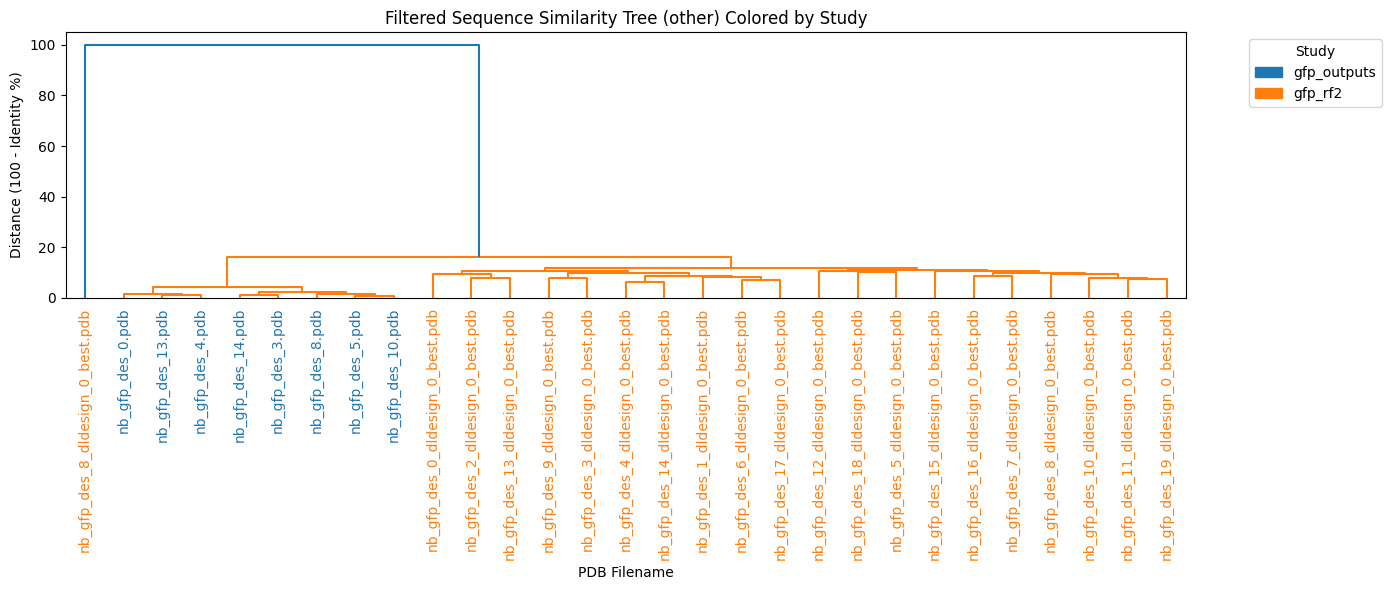

In [34]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
import matplotlib.patches as mpatches
import numpy as np

# Filter seqs

nname_filters = ['hchain', 'antigenchain', 'other']  # lowercase
df['Role'] = df['Role'].str.strip().str.lower()
filtered_seqs = df[df['Role'].isin(name_filters)]['Sequence_noX'].tolist()
filtered_seqs = list(dict.fromkeys(filtered_seqs))  # preserves order but removes duplicates

# print (hchain_seqs)
# Filter all sequences to only those containing 'hchain' or 'agchain' (case-insensitive)
# filtered_seqs = [seq for seq in all_seqs if ('hchain' in seq.lower())]
# print(filtered_seqs)
# Initialize matrix for filtered sequences only

dist_matrix_filtered = pd.DataFrame(100.0, index=filtered_seqs, columns=filtered_seqs, dtype=float)

# Fill distances from similar_df but only if both sequences are in filtered_seqs
for _, row in similar_df.iterrows():
    seq1, seq2 = row['Seq1'], row['Seq2']
    if seq1 in filtered_seqs and seq2 in filtered_seqs:
        dist = 100 - row['Identity']
        dist_matrix_filtered.loc[seq1, seq2] = dist
        dist_matrix_filtered.loc[seq2, seq1] = dist

# Zero distance on diagonal
np.fill_diagonal(dist_matrix_filtered.values, 0)

# --- Filter sequences to only hchain and agchain ---
# filtered_seqs = [seq for seq in all_seqs if ('hchain' in seq.lower())]

# Filter the distance matrix to include only filtered sequences
# filtered_dist_matrix = dist_matrix.loc[filtered_seqs, filtered_seqs]

# Build a mapping from sequence to PDB (or filename)
seq_to_pdb = df[['Sequence_noX', 'PDB']].drop_duplicates().set_index('Sequence_noX')['PDB'].to_dict()

# Prepare condensed distance matrix from filtered distance matrix
condensed_dist = squareform(dist_matrix_filtered.values)

# Compute linkage matrix (UPGMA clustering)
linkage_matrix = linkage(condensed_dist, method='average')

# Plot dendrogram with colored labels by Study for filtered sequences
# Replace sequence labels with their PDB names
pdb_labels = [seq_to_pdb.get(seq, seq) for seq in filtered_seqs]

# Plot dendrogram with PDB labels
plt.figure(figsize=(14, 6))
dendro = dendrogram(linkage_matrix, labels=pdb_labels, leaf_rotation=90, leaf_font_size=10)

# Color leaf labels based on Study mapping
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()
for label in x_labels:
    pdb_name = label.get_text()
    
    # Get corresponding sequence for this PDB (reverse lookup)
    # Since seq_to_pdb is seq → pdb, we need pdb → seq lookup
    seq = next((s for s, p in seq_to_pdb.items() if p == pdb_name), None)
    
    study = seq_to_study.get(seq, 'Unknown')
    label.set_color(study_to_color.get(study, 'black'))

# Add legend for Study colors
legend_handles = [mpatches.Patch(color=color, label=study) for study, color in study_to_color.items()]
plt.legend(handles=legend_handles, title='Study', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Filtered Sequence Similarity Tree (' + name_filter +') Colored by Study')
plt.xlabel('PDB Filename')
plt.ylabel('Distance (100 - Identity %)')
plt.tight_layout()
plt.savefig("dendrogram_plot.pdf", format='pdf', bbox_inches='tight')
plt.show()